In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
df = pd.read_csv('sa_temps.csv')

In [6]:
df.head()

,datetime,temp
0,2012-10-01 13:00:00,289.290000
1,2012-10-01 14:00:00,289.303649
2,2012-10-01 15:00:00,289.338497
3,2012-10-01 16:00:00,289.373345
4,2012-10-01 17:00:00,289.408193


In [7]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [9]:
df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

df.head(10)

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
2012-10-01 18:00:00,61.327473
2012-10-01 19:00:00,61.390200
2012-10-01 20:00:00,61.452926
2012-10-01 21:00:00,61.515652



**seasonality:** a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality
trend: long term upwards or downwards movement

**cycle:** Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons
Data Splitting
Ideally all splits contain a season
Human-based
Percentage based
Cross Validation


# Data Splitting
Ideally all splits contain a season
- Human-based
- Percentage based
- Cross Validation


**Percentage-Based**

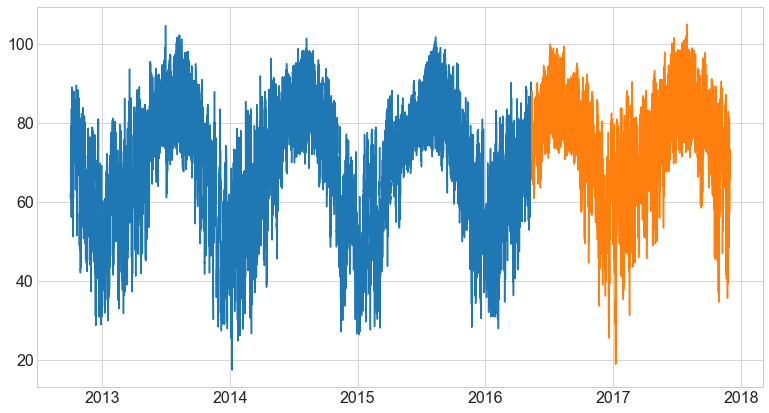

In [10]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

**Human-Based**

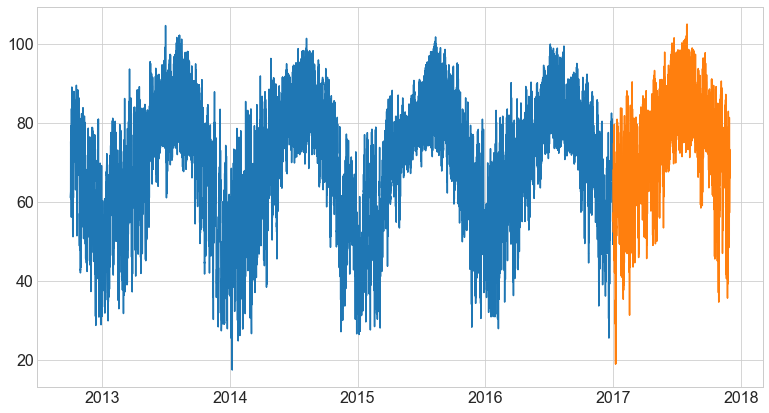

In [12]:
train = df[:'2016'] # includes 2016
test = df['2017']

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

# Visualizations

In [13]:
y = train.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

**Don't consider the time series**

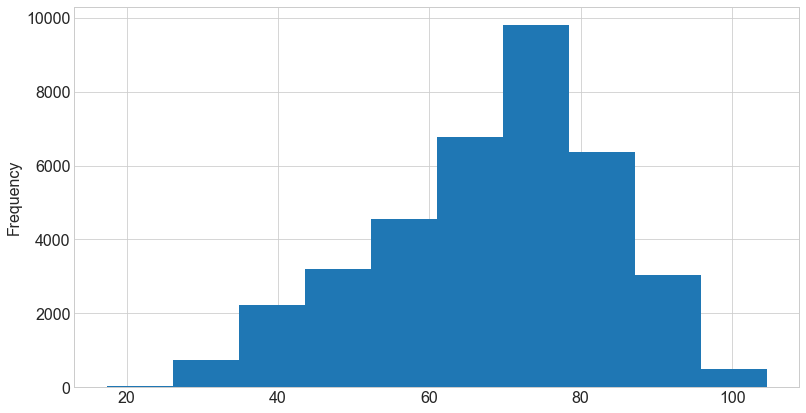

In [14]:
y.plot.hist()


- by month
- by weekday

In [20]:
train['month'] = train.index.month

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


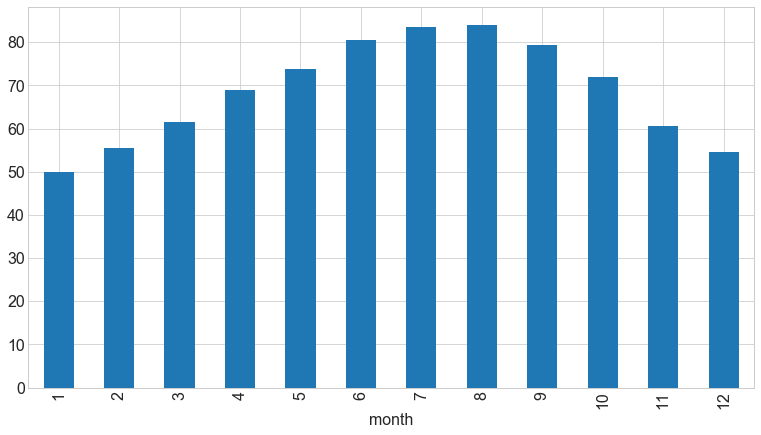

In [21]:
train.groupby('month').temp.mean().plot.bar()

In [25]:
pd.__version__

'1.0.1'

In [23]:
train['weekday'] = train.index.day_name()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
train.head()

,temp,month,weekday
datetime,,,
2012-10-01 13:00:00,61.052000,10,Monday
2012-10-01 14:00:00,61.076568,10,Monday
2012-10-01 15:00:00,61.139294,10,Monday
2012-10-01 16:00:00,61.202020,10,Monday
2012-10-01 17:00:00,61.264747,10,Monday


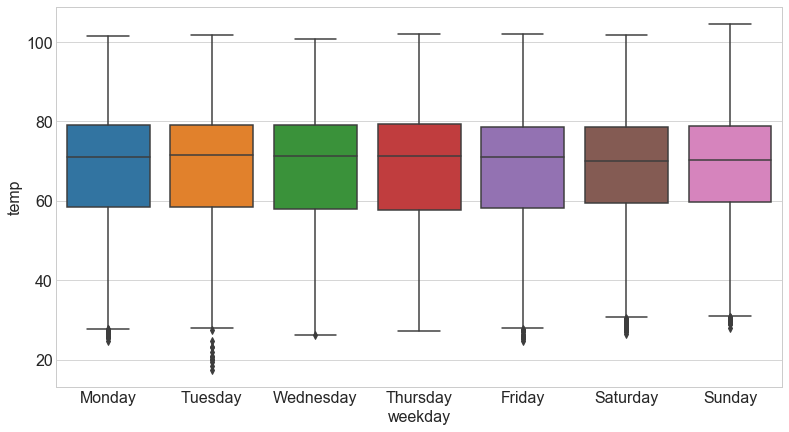

In [27]:
sns.boxplot(data=train, y='temp', x='weekday')

**Visualize the target over time**

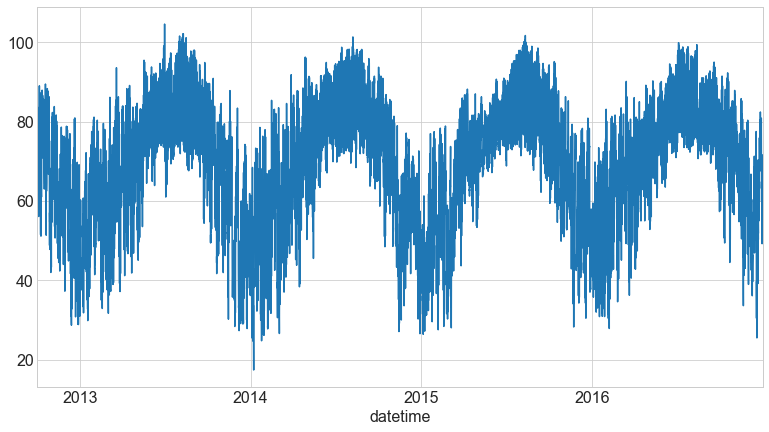

In [15]:
y.plot()

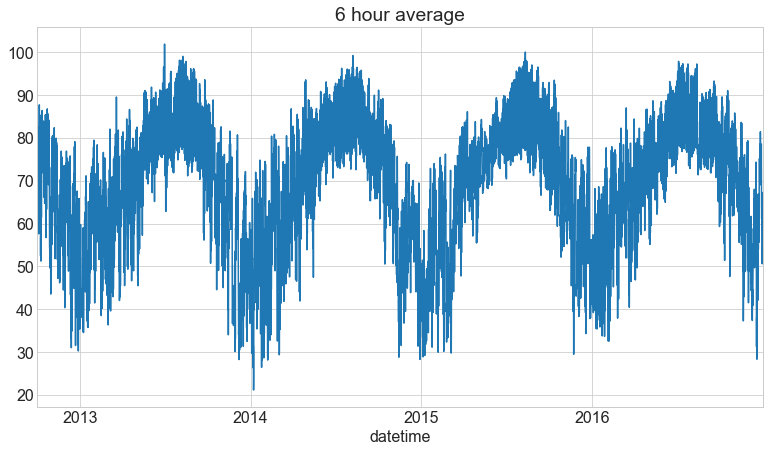

In [16]:
y.resample('6H').mean().plot(title='6 hour average')


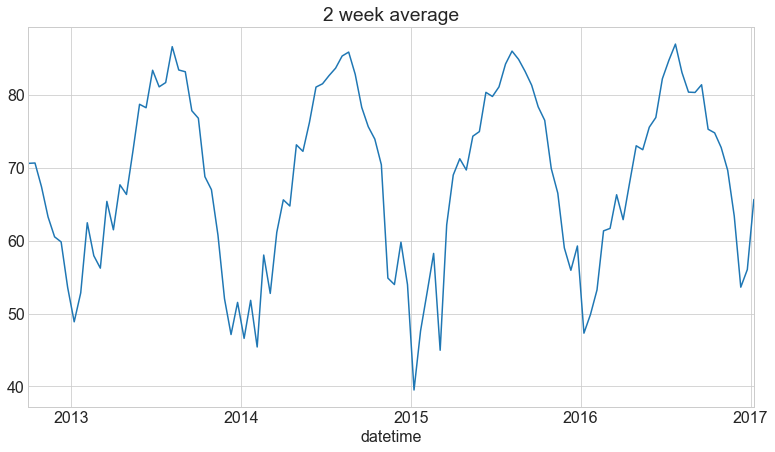

In [17]:
y.resample('2W').mean().plot(title='2 week average')


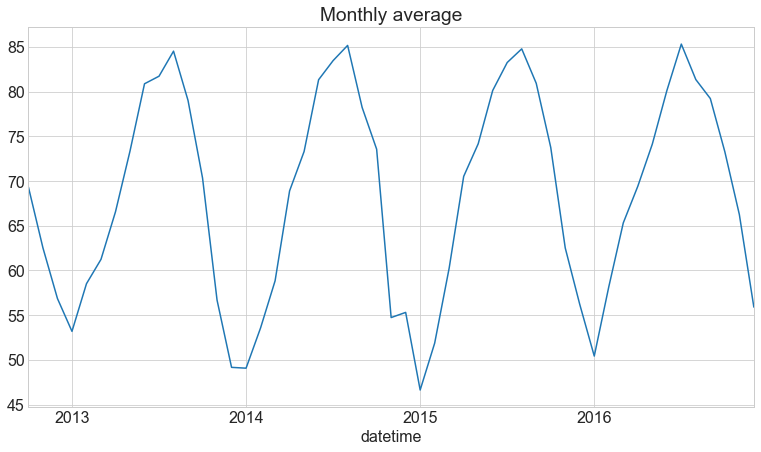

In [29]:
y.resample('M').mean().plot(title='Monthly average')


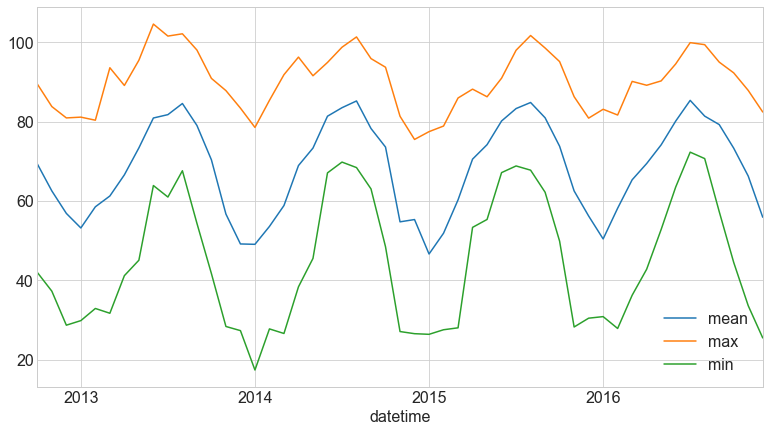

In [31]:
y.resample('M').agg(['mean', 'max', 'min']).plot()

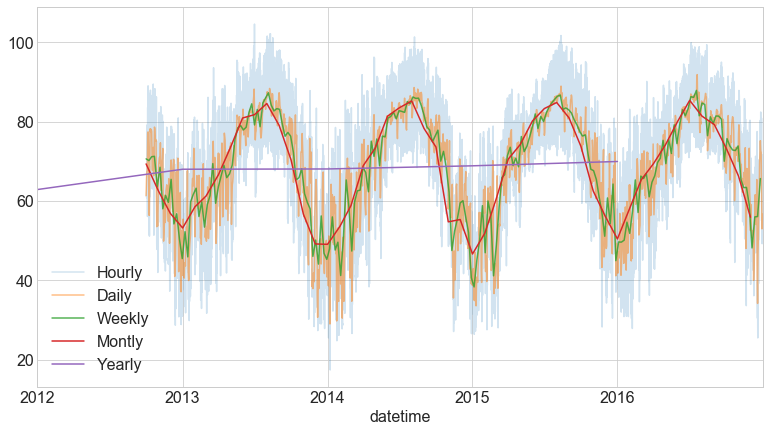

In [28]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

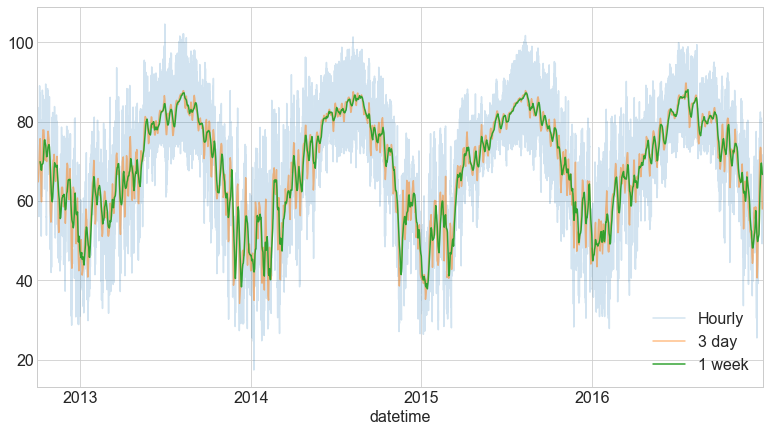

In [32]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

**Visualize change over time**

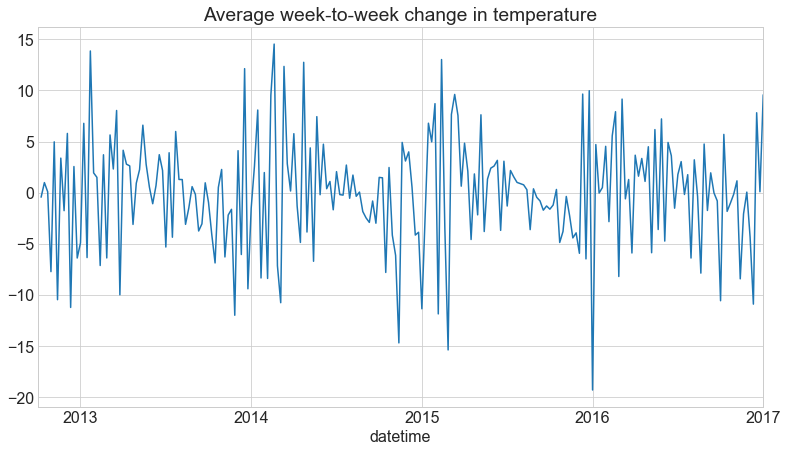

In [34]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature')

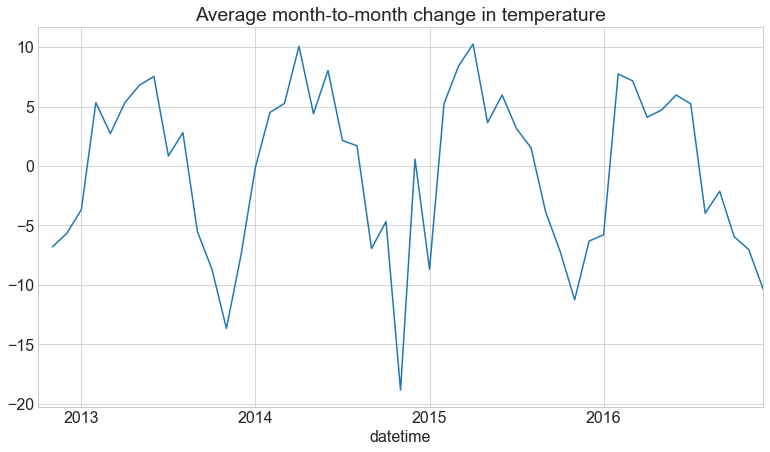

In [35]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature')

# Seasonal Plot

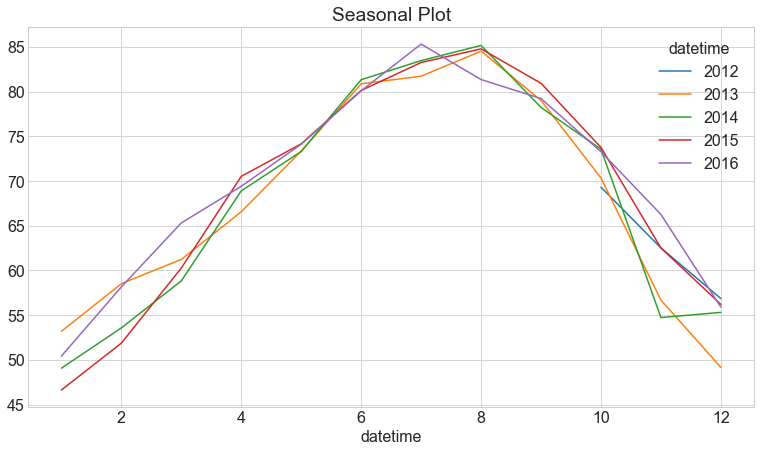

In [36]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

In [38]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

datetime,2012,2013,2014,2015,2016
datetime,,,,,
1,NaN,53.192333,49.072897,46.631940,50.427347
2,NaN,58.522799,53.579080,51.874683,58.165749
3,NaN,61.244479,58.842459,60.277705,65.323011
4,NaN,66.569717,68.908933,70.526879,69.415316
5,NaN,73.358529,73.311970,74.169747,74.129780
6,NaN,80.885728,81.337658,80.135967,80.097570
7,NaN,81.731819,83.476876,83.264325,85.325640
8,NaN,84.534117,85.178102,84.789859,81.357023
9,NaN,79.016805,78.238621,80.938208,79.233476


# Seasonal Subseries Plot

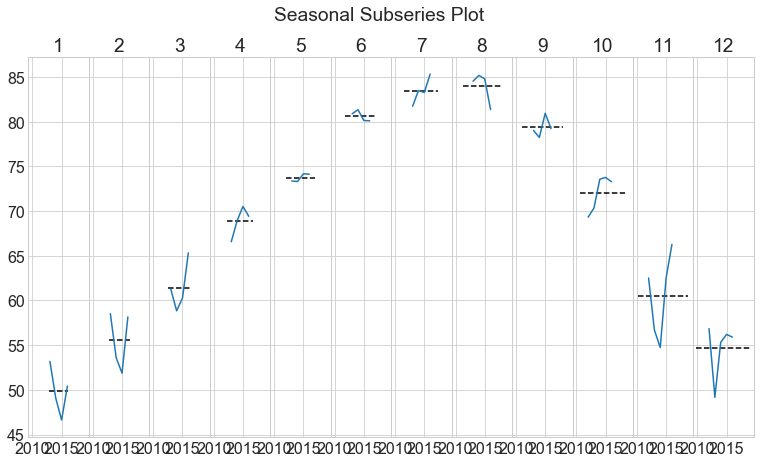

In [39]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

# Lag Plot

Text(0.5, 1.0, 'Lag plot with lag=1')

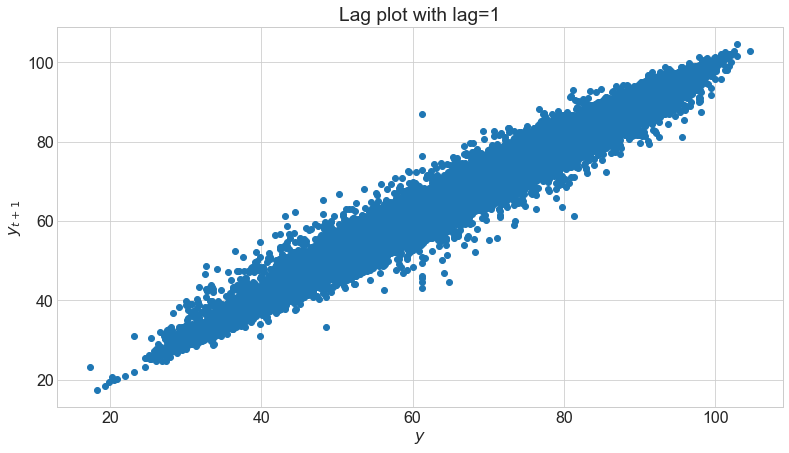

In [40]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[Text(0, 0.5, 't + 1'), Text(0.5, 0, 't')]

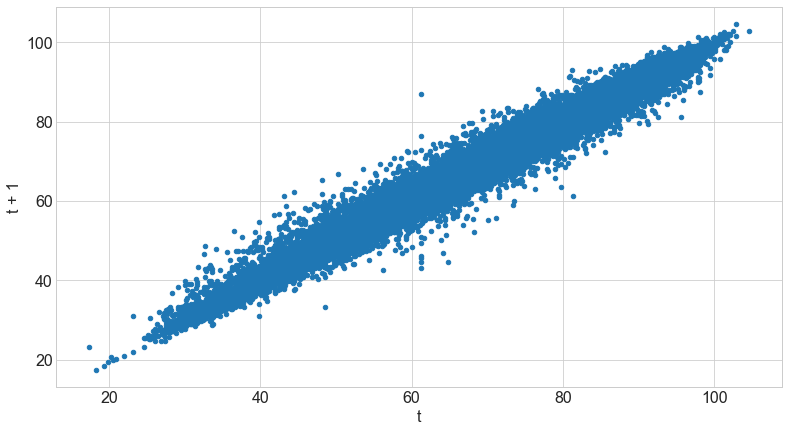

In [41]:
train['y(t + 1)'] = train.temp.shift(-1)
ax = train.plot.scatter(x='temp', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [42]:
del train['y(t + 1)']


,this_week,month,the_next_week
datetime,,,
2012-10-07,70.595201,10.000000,70.152821
2012-10-14,70.152821,10.000000,71.138375
2012-10-21,71.138375,10.000000,71.230464
2012-10-28,71.230464,10.000000,63.510554
2012-11-04,63.510554,10.571429,68.482625
...,...,...,...
2016-12-04,59.062094,11.571429,48.163625
2016-12-11,48.163625,12.000000,55.979132
2016-12-18,55.979132,12.000000,56.073143


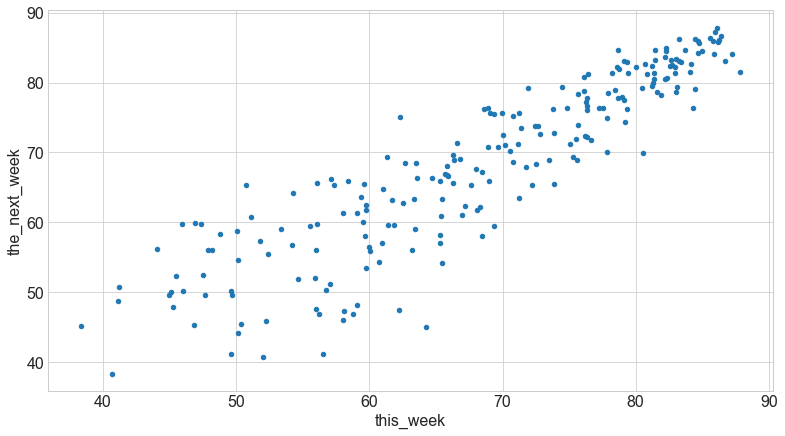

In [43]:

weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.temp.shift(-1)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,this_week,month,12_weeks_out
datetime,,,
2012-10-07,70.595201,10.000000,50.376741
2012-10-14,70.152821,10.000000,45.473616
2012-10-21,71.138375,10.000000,52.252877
2012-10-28,71.230464,10.000000,45.907936
2012-11-04,63.510554,10.571429,59.763739
...,...,...,...
2016-12-04,59.062094,11.571429,NaN
2016-12-11,48.163625,12.000000,NaN
2016-12-18,55.979132,12.000000,NaN


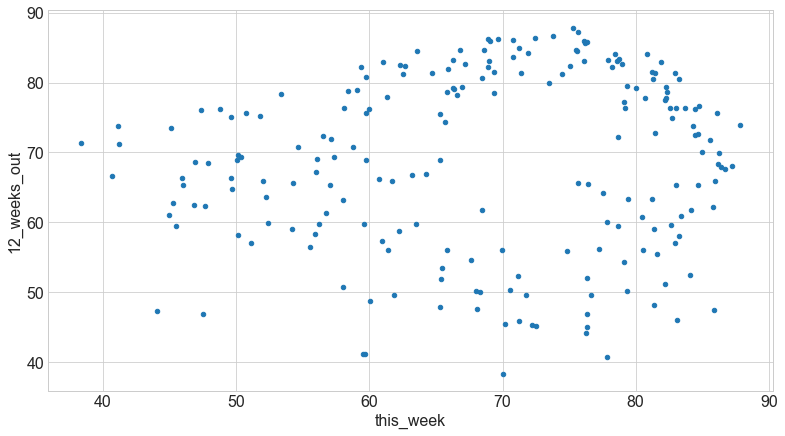

In [44]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,month,half_a_year_later
datetime,,,
2012-10-07,70.595201,10.000000,63.558611
2012-10-14,70.152821,10.000000,66.345532
2012-10-21,71.138375,10.000000,68.965502
2012-10-28,71.230464,10.000000,65.862071
2012-11-04,63.510554,10.571429,66.797107
...,...,...,...
2016-12-04,59.062094,11.571429,NaN
2016-12-11,48.163625,12.000000,NaN
2016-12-18,55.979132,12.000000,NaN


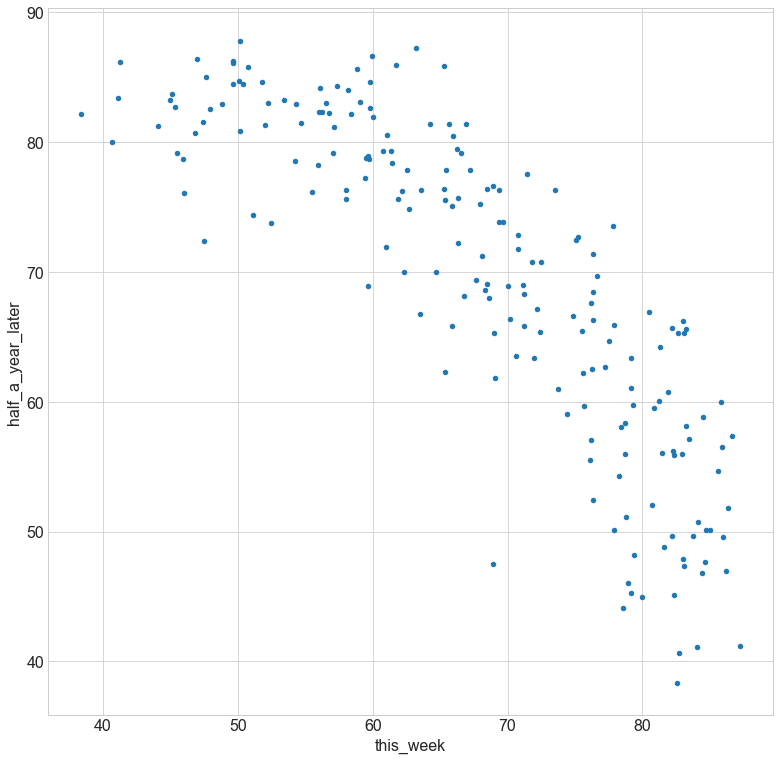

In [45]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

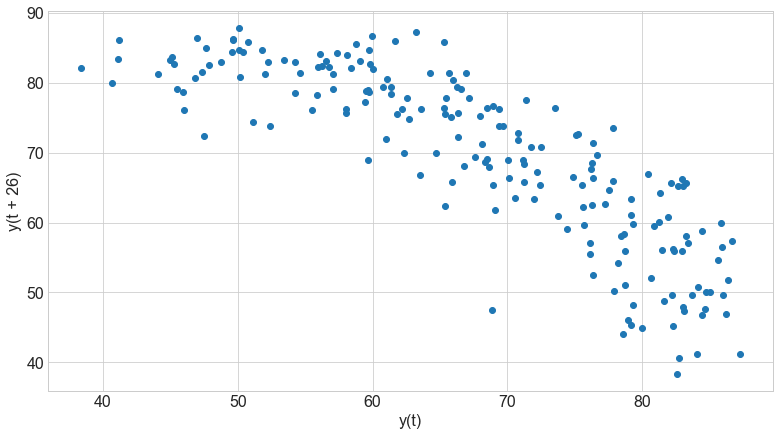

In [46]:
pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=26)


Autocorrelation

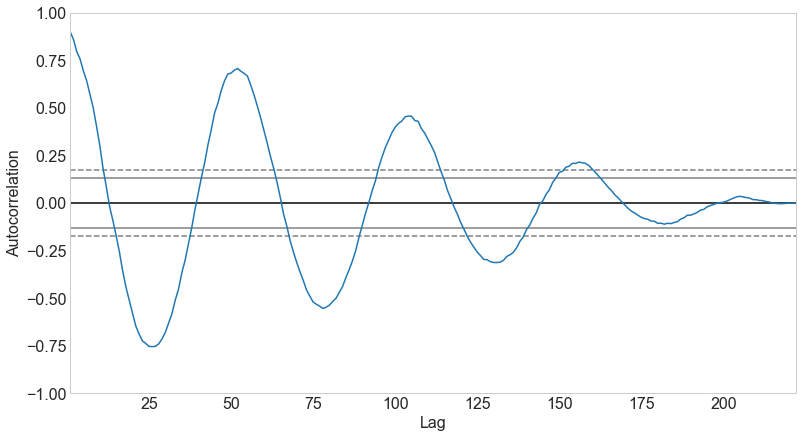

In [48]:
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())

# Seasonal Decomposition

- seasonal + trend + error

In [49]:
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
datetime,,,,
2012-10-07,70.595201,NaN,8.545501,NaN
2012-10-14,70.152821,NaN,7.255470,NaN
2012-10-21,71.138375,NaN,2.468309,NaN
2012-10-28,71.230464,NaN,1.820126,NaN
2012-11-04,63.510554,NaN,-0.114287,NaN


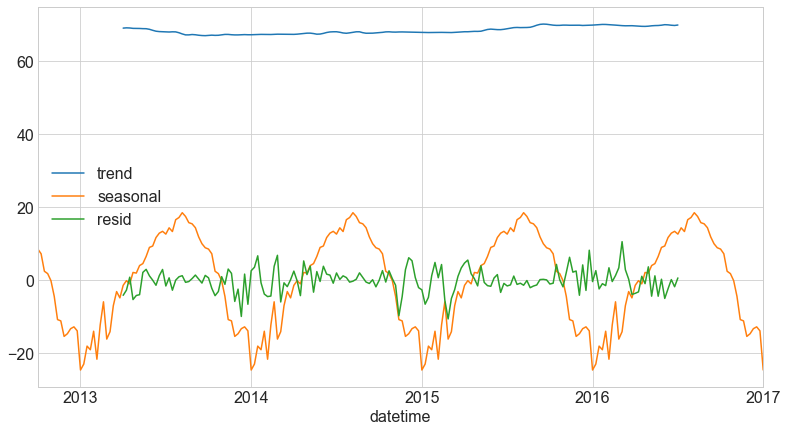

In [50]:
decomposition.iloc[:, 1:].plot()
